In [2]:
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
group_1 = [8.6, 7.8, 5.9, 8.8, 9.2, 7.4, 7.9, 9.5, 6.4, 8.5]
group_2 = [9.3, 8.4, 7.9, 8.7, 8.5, 9.8, 9.0, 8.5, 8.7, 9.4]
group_3 = [8.2, 8.8, 7.5, 7.9, 9.2, 8.1, 7.6, 7.4, 7.0, 8.7]

In [4]:
df = pd.DataFrame(columns = ['system', 'mean', 'variance'])
df.loc[0] = ['score-based', np.mean(group_1), np.std(group_1)]
df.loc[1] = ['content-based', np.mean(group_2), np.std(group_2)]
df.loc[2] = ['collaborative', np.mean(group_3), np.std(group_3)]
df

,system,mean,variance
0,score-based,8.00,1.109955
1,content-based,8.82,0.530660
2,collaborative,8.04,0.662118


In [ ]:
stats.kruskal(group_1, group_2, group_3)

KruskalResult(statistic=4.964308035714291, pvalue=0.0835630353250524)

In [ ]:
f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=2.956352459016395, pvalue=0.06902438391398237)

In [ ]:
df = pd.DataFrame({'score': [8.6, 7.8, 5.9, 8.8, 9.2, 7.4, 7.9, 9.5, 6.4, 8.5,
                             9.3, 8.4, 7.9, 8.7, 8.5, 9.8, 9.0, 8.5, 8.7, 9.4,
                             8.2, 8.8, 7.5, 7.9, 9.2, 8.1, 7.6, 7.4, 7.0, 8.7],
                   'group': np.repeat(['group_1', 'group_2', 'group_3'], repeats=10)}) 

In [ ]:
tukey_result = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.1)

In [ ]:
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.10 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
group_1 group_2     0.82 0.0974  0.0052 1.6348   True
group_1 group_3     0.04 0.9939 -0.7748 0.8548  False
group_2 group_3    -0.78 0.1194 -1.5948 0.0348  False
-----------------------------------------------------


Text(0.5, 0, 'score')

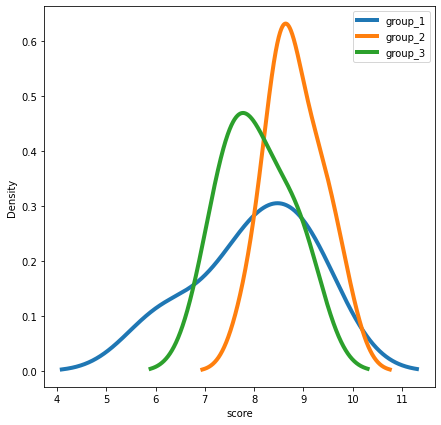

In [ ]:
import matplotlib.pyplot as plt
  
data_wide = pd.DataFrame({'group_1': group_1, 'group_2': group_2, 'group_3': group_3})
data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("score")